In [59]:
# imports
import pandas as pd # for using pandas data frames
import numpy as np # for converting numpy array to data frame

In [60]:
# imports for graphs and plotting
#get_ipython().system('pip install ggplot')
#get_ipython().system('pip install plotnine')

In [61]:
from plotnine import ggplot, aes, geom_line

#import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

get_ipython().run_line_magic('matplotlib', 'inline')

from matplotlib.pylab import rcParams

rcParams['figure.figsize']=20,10

In [62]:

# reading from csv data file as pandas data frame
df = pd.read_csv(r'cleaned_data02.csv')

# checking the data (rows 1-10)
print(df[1:10])

       country iso3c iso2c  year  Intentional_homicides_per100k  \
1  Afghanistan   AFG    AF  2010                       3.368110   
2  Afghanistan   AFG    AF  2011                       4.087337   
3  Afghanistan   AFG    AF  2012                       6.251328   
4  Afghanistan   AFG    AF  2015                       9.783922   
5  Afghanistan   AFG    AF  2016                       6.551163   
6  Afghanistan   AFG    AF  2017                       6.678401   
7  Afghanistan   AFG    AF  2018                       6.655561   
8      Albania   ALB    AL  2000                       4.186312   
9      Albania   ALB    AL  2001                       7.029425   

   Suicide_mortality_rate_per100k        GDP_us  GDP_per_capita  \
1                             4.3  1.585668e+10     1710.575411   
2                             4.1  1.780511e+10     1699.488110   
3                             4.0  1.990732e+10     1914.774228   
4                             4.0  1.913421e+10     2087.3053

In [63]:
# creating a data frame from raw data with headings
data_frame = pd.DataFrame(np.array(df), columns = ['country', 'iso3c', 'iso2c', 'year', 'Intentional_homicides_per100k', 'Suicide_mortality_rate_per100k', 'GDP_us', 'GDP_per_capita', 'adminregion', 'incomeLevel'])
data_frame.head()

,country,iso3c,iso2c,year,Intentional_homicides_per100k,Suicide_mortality_rate_per100k,GDP_us,GDP_per_capita,adminregion,incomeLevel
0,Afghanistan,AFG,AF,2009,3.926774,4.4,12416161049.0,1519.692923,South Asia,Low income
1,Afghanistan,AFG,AF,2010,3.36811,4.3,15856678596.0,1710.575411,South Asia,Low income
2,Afghanistan,AFG,AF,2011,4.087337,4.1,17805113119.0,1699.48811,South Asia,Low income
3,Afghanistan,AFG,AF,2012,6.251328,4.0,19907317066.0,1914.774228,South Asia,Low income
4,Afghanistan,AFG,AF,2015,9.783922,4.0,19134211764.0,2087.305323,South Asia,Low income


In [64]:
# removing blank rows from data frame, setting threshold of 1 - anything with 1 NaN will be removed
newdf = data_frame = data_frame.dropna(thresh=10)

newdf.head()

,country,iso3c,iso2c,year,Intentional_homicides_per100k,Suicide_mortality_rate_per100k,GDP_us,GDP_per_capita,adminregion,incomeLevel
0,Afghanistan,AFG,AF,2009,3.926774,4.4,12416161049.0,1519.692923,South Asia,Low income
1,Afghanistan,AFG,AF,2010,3.36811,4.3,15856678596.0,1710.575411,South Asia,Low income
2,Afghanistan,AFG,AF,2011,4.087337,4.1,17805113119.0,1699.48811,South Asia,Low income
3,Afghanistan,AFG,AF,2012,6.251328,4.0,19907317066.0,1914.774228,South Asia,Low income
4,Afghanistan,AFG,AF,2015,9.783922,4.0,19134211764.0,2087.305323,South Asia,Low income


In [65]:
# checking the size of the data set
newdf.shape

(1487, 10)

In [66]:
# saving to new csv
#newdf.to_csv('cleaned_data02.csv')

 We have now cut our data from 13,000+ rows down to 1,411 after removing any rows which were mostly blank (NaN) rows. Our reasoning for this was due to missing values would cause issues when implementing any machine learning modules.
 
Data Exploration
 We now want to create some graphs to help visualize the current data

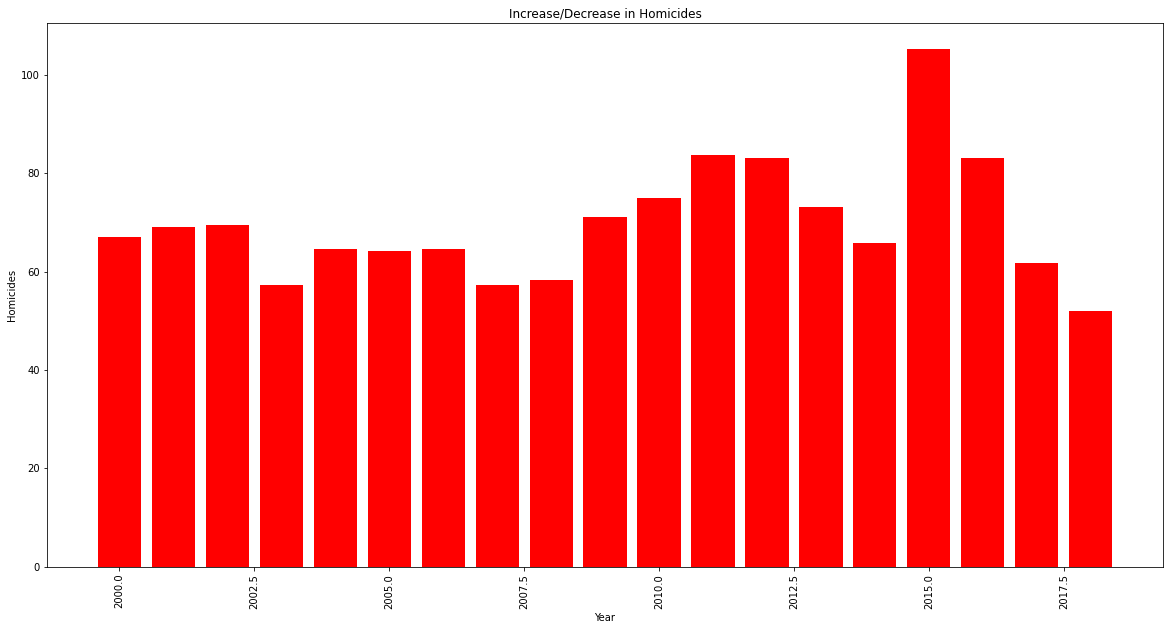

In [67]:
year = newdf['year']
homicides = newdf['Intentional_homicides_per100k']

plt.bar(year, homicides, color="red")

plt.xlabel('Year')

plt.ylabel('Homicides')

plt.title('Increase/Decrease in Homicides')

plt.xticks(rotation=90)

plt.show()

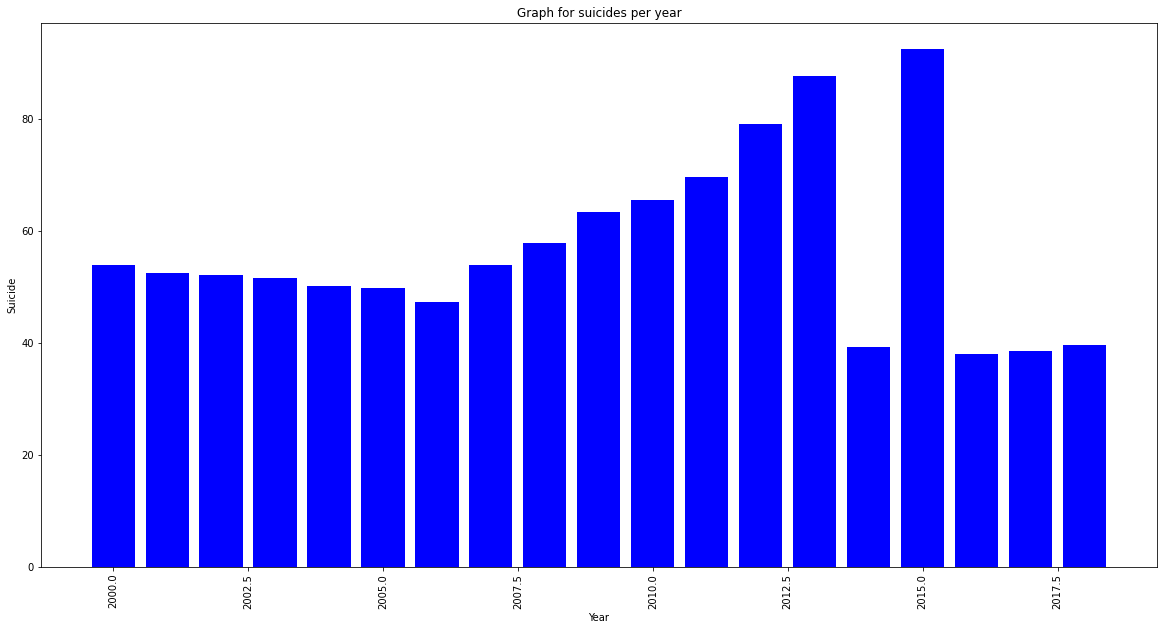

In [68]:
year = newdf['year']
Suicide = newdf['Suicide_mortality_rate_per100k']

plt.bar(year, Suicide, color="blue")

plt.xlabel('Year')

plt.ylabel('Suicide')

plt.title('Graph for suicides per year')

plt.xticks(rotation=90)

plt.show()

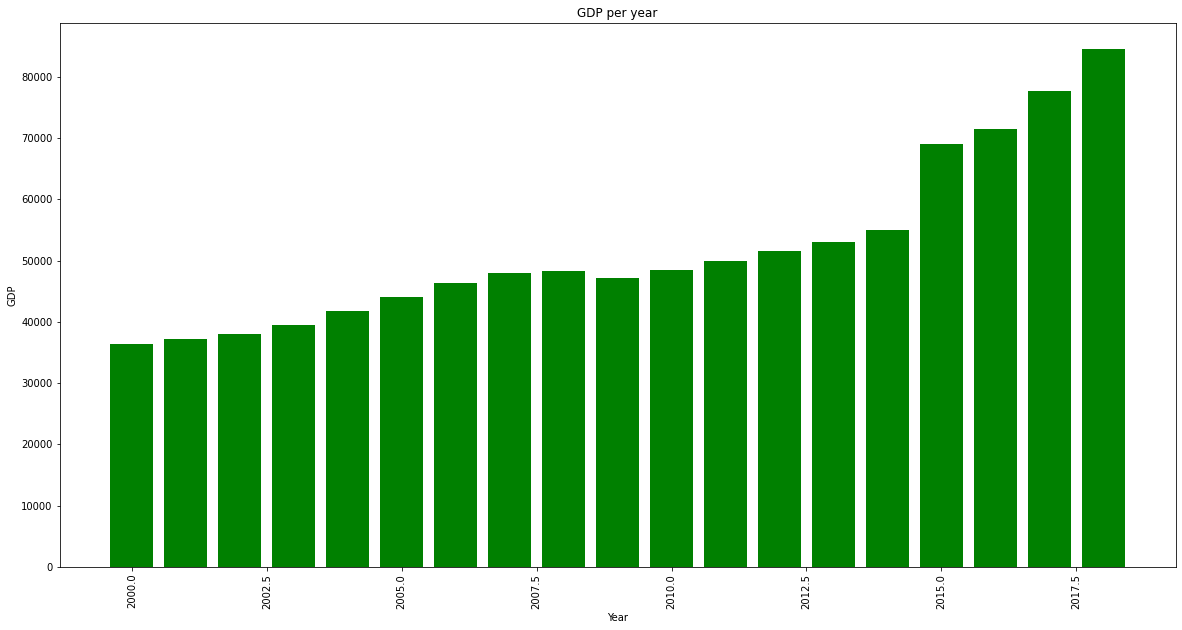

In [69]:
year = newdf['year']
GDP = newdf['GDP_per_capita']

plt.bar(year, GDP, color="green")

plt.xlabel('Year')

plt.ylabel('GDP')

plt.title('GDP per year')

plt.xticks(rotation=90)

plt.show()

Regression

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

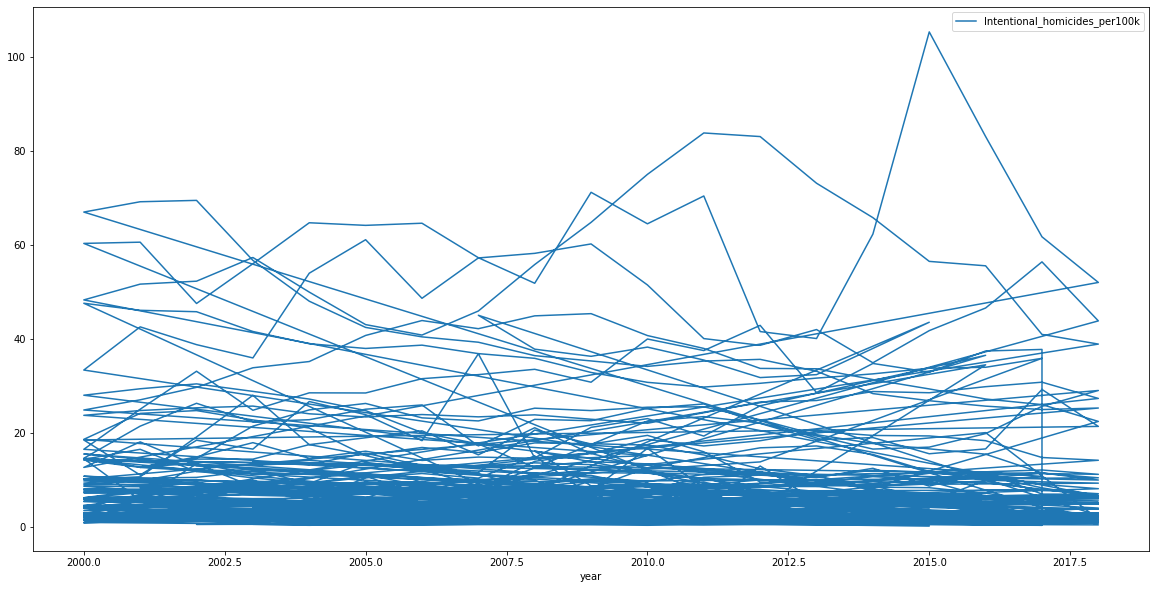

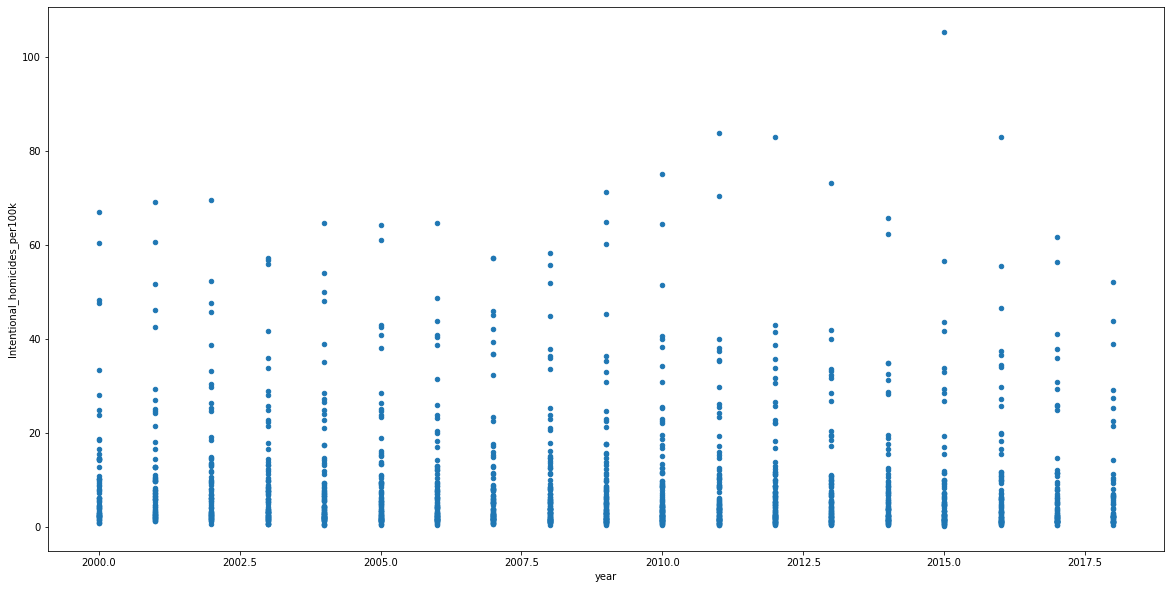

In [71]:
regression = pd.read_csv('cleaned_data02.csv')
regression.shape
regression.head(10)
regression.plot('year', 'Intentional_homicides_per100k')
regression.plot.scatter('year', 'Intentional_homicides_per100k')
x_train, x_test, y_train, y_test = train_test_split(regression.year, regression.Intentional_homicides_per100k, test_size = 0.2)
regr = LinearRegression()
regr.fit(np.array(x_train).reshape(-1,1), y_train)
preds = regr.predict(np.array(x_test).reshape(-1,1))
y_test.head()
preds
residuals = preds - y_test
#plt.hist(residuals)
#mean_squared_error(y_test,preds)**0.5




(array([  2.,   0.,   2.,   2.,   6.,   9.,  12.,  10.,  47., 208.]),
 array([-73.66776719, -65.29892348, -56.93007976, -48.56123605,
        -40.19239234, -31.82354863, -23.45470492, -15.0858612 ,
         -6.71701749,   1.65182622,  10.02066993]),
 <BarContainer object of 10 artists>)

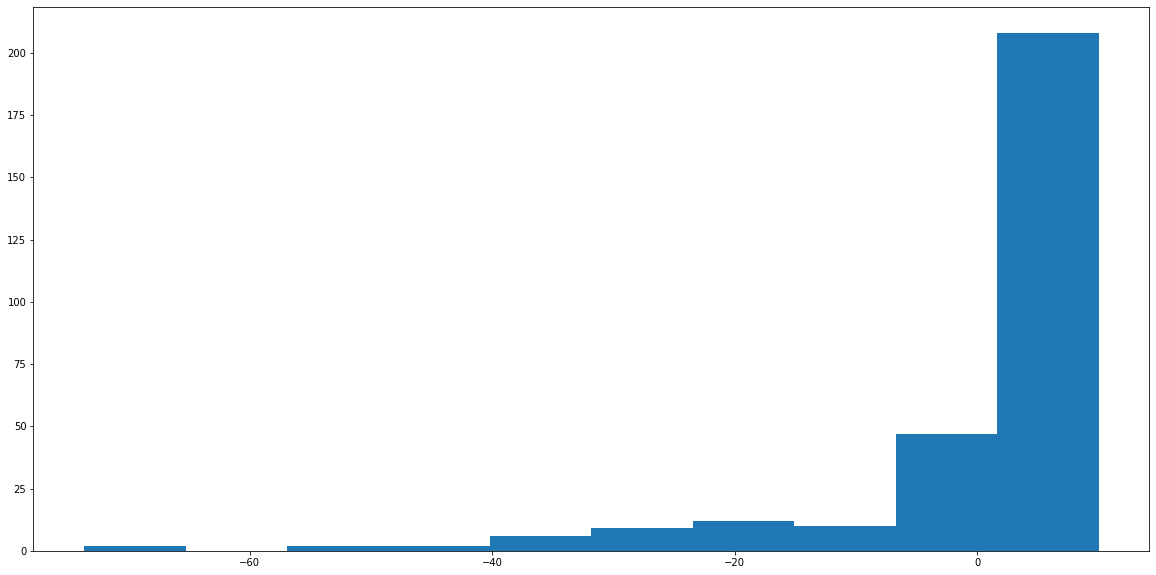

In [72]:
plt.hist(residuals)

In [73]:
mean_squared_error(y_test, preds) ** 0.5

12.9560289873887

The mean squared error tells us how far off the line of best fit the regressed predictions are.

Mean Squared Error = 12.691 

In [74]:
dataset = pd.read_csv("cleaned_data02.csv")
dataset.head()

,country,iso3c,iso2c,year,Intentional_homicides_per100k,Suicide_mortality_rate_per100k,GDP_us,GDP_per_capita,adminregion,incomeLevel
0,Afghanistan,AFG,AF,2009,3.926774,4.4,1.241616e+10,1519.692923,South Asia,Low income
1,Afghanistan,AFG,AF,2010,3.368110,4.3,1.585668e+10,1710.575411,South Asia,Low income
2,Afghanistan,AFG,AF,2011,4.087337,4.1,1.780511e+10,1699.488110,South Asia,Low income
3,Afghanistan,AFG,AF,2012,6.251328,4.0,1.990732e+10,1914.774228,South Asia,Low income
4,Afghanistan,AFG,AF,2015,9.783922,4.0,1.913421e+10,2087.305323,South Asia,Low income


In [75]:
dataset.shape



(1487, 10)

In [76]:
dataset.isna().sum()
dataset.duplicated().any()

False

C:\Users\moham\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
C:\Users\moham\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


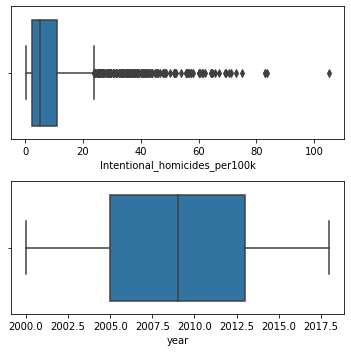

In [77]:
import seaborn as sns

fig, axs = plt.subplots(2, figsize = (5,5))

plt1 = sns.boxplot(dataset['Intentional_homicides_per100k'], ax = axs[0])

plt2 = sns.boxplot(dataset['year'], ax = axs[1])

plt.tight_layout()

<AxesSubplot:xlabel='Count', ylabel='GDP_us'>

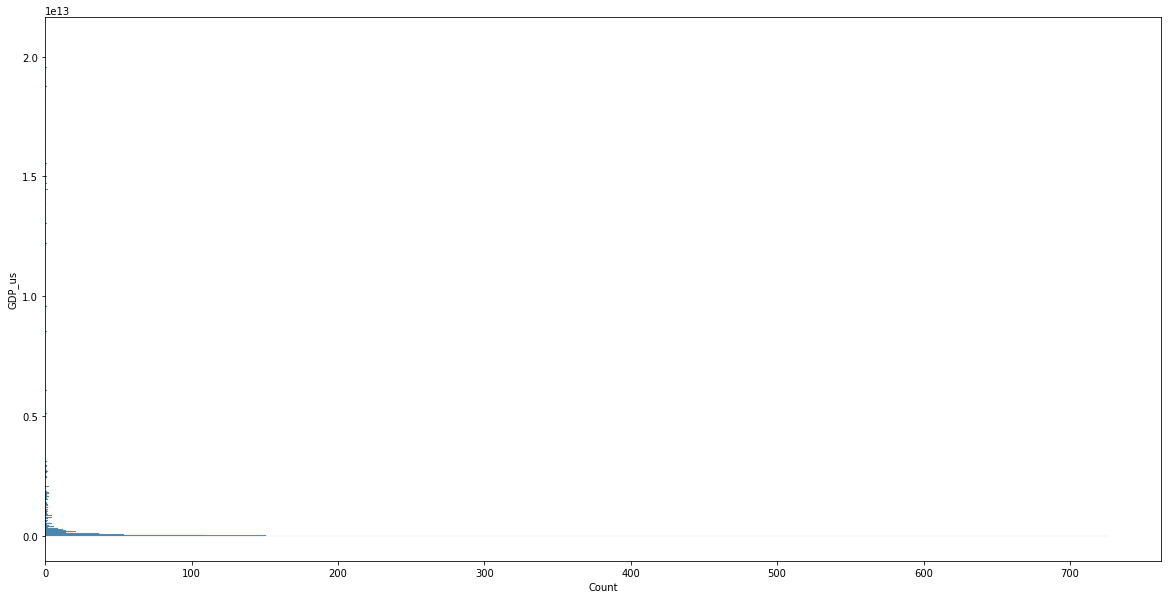

In [78]:
sns.histplot(data=dataset, y='GDP_us')

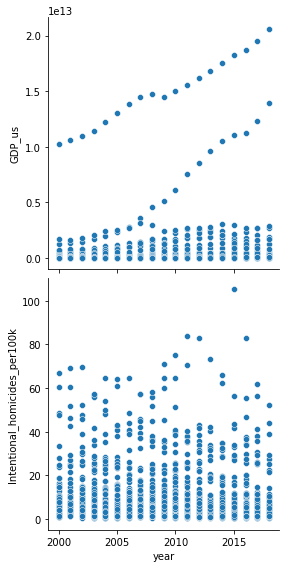

In [79]:
sns.pairplot(dataset, x_vars='year', y_vars=['GDP_us', 'Intentional_homicides_per100k'], height=4, aspect=1, kind='scatter')

plt.show()

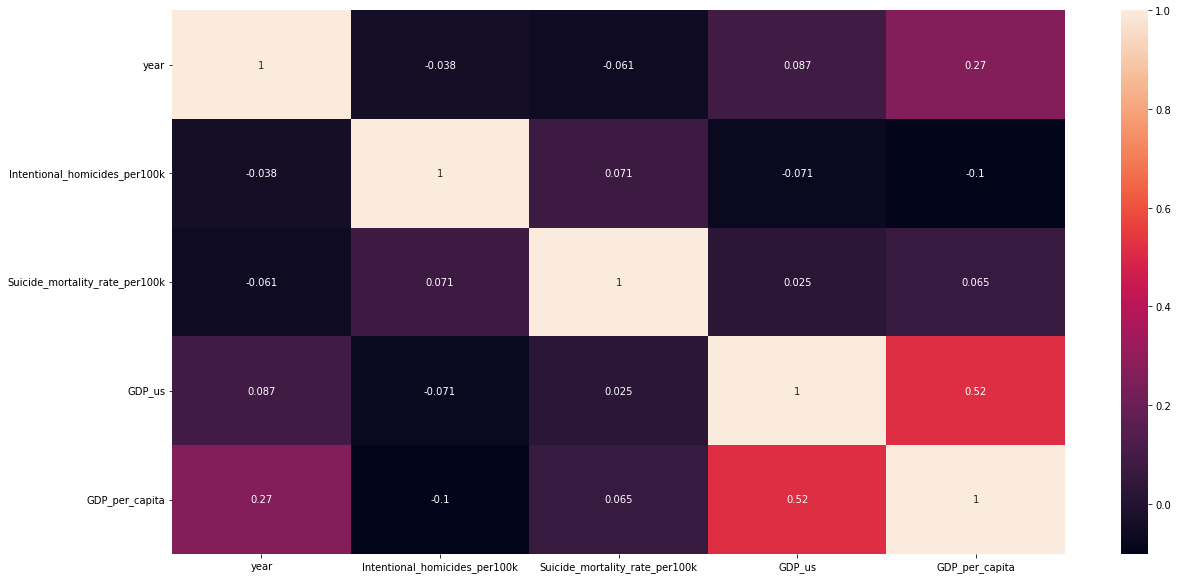

In [80]:
sns.heatmap(dataset.corr(), annot = True)
plt.show()

The above Pearson correlation matrix uses multiple independent variables with the dependent variable being 'year'.

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [88]:
#Setting the value for X and Y
x = dataset[['Intentional_homicides_per100k']]
y = dataset['year']

In [89]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)

In [90]:
slr= LinearRegression()  
slr.fit(x_train, y_train)

LinearRegression()

In [92]:
#Printing the model coefficients

print('Intercept: ', slr.intercept_)
print('Coefficient:', slr.coef_)

Intercept:  2009.0564179672842
Coefficient: [-0.01086921]


In [93]:
print('Regression Equation: Sales = 2009.0564179672842 + -0.01086921 * Fee')

Regression Equation: Sales = 2009.0564179672842 + -0.01086921 * Fee


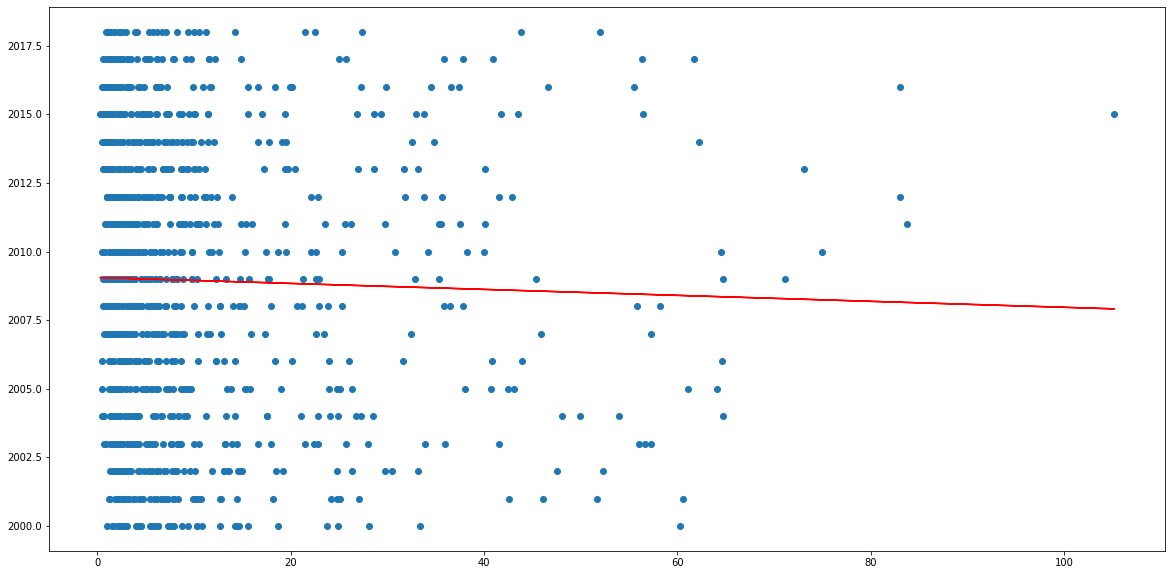

In [94]:
#Line of best fit

plt.scatter(x_train, y_train)
plt.plot(x_train, 2009.0564179672842 + -0.01086921*x_train, 'r')
plt.show()

In [95]:
#Prediction of Test and Training set result  

y_pred_slr= slr.predict(x_test)  
x_pred_slr= slr.predict(x_train)

In [96]:
print("Prediction for test set: {}".format(y_pred_slr))

Prediction for test set: [2009.05033518 2008.99084066 2008.74284307 2009.04596489 2009.00683283
 2009.0374051  2009.03259661 2008.59978118 2009.00932604 2008.90753437
 2008.99866149 2008.97957504 2008.89414407 2008.97709962 2008.95385627
 2008.99834989 2009.02381175 2008.98464696 2009.03157103 2008.90981823
 2008.98588753 2008.99006393 2009.02350819 2009.0406554  2009.03387644
 2008.85473854 2009.02833722 2009.0166895  2009.03034846 2008.59777994
 2009.04509212 2008.9546933  2008.92998359 2008.78095085 2009.03903918
 2008.99347696 2009.01119925 2009.03473902 2008.73651462 2009.03527012
 2009.0483832  2009.02989616 2009.00295424 2008.96885877 2009.01300755
 2008.40212847 2008.77660518 2009.00309415 2008.98381444 2008.73806913
 2008.8036314  2009.01055917 2008.99294713 2008.93705193 2009.0444076
 2008.93259684 2008.9621863  2009.02912558 2008.96056179 2008.93491592
 2008.8978776  2009.04164555 2008.80154801 2009.0014107  2009.04633743
 2009.03931681 2008.93643197 2009.02925398 2008.63332

In [97]:
#Actual value and the predicted value

slr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_slr})
slr_diff

,Actual value,Predicted value
258,2011,2009.050335
57,2016,2008.990841
225,2014,2008.742843
1335,2010,2009.045965
499,2010,2009.006833
...,...,...
739,2011,2008.942262
561,2017,2009.043932
531,2011,2009.015704
1098,2012,2008.961560


In [98]:
#Predict for any value
slr.predict([[12]])

C:\Users\moham\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names


array([2008.92598744])

In [99]:
# print the R-squared value for the model

from sklearn.metrics import accuracy_score

print('R squared value of the model: {:.2f}'.format(slr.score(x,y)*100))

R squared value of the model: 0.12


In [100]:
# 0 means the model is perfect. Therefore the value should be as close to 0 as possible

meanAbErr = metrics.mean_absolute_error(y_test, y_pred_slr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_slr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_slr))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

Mean Absolute Error: 4.227467901650052
Mean Square Error: 25.07776907266153
Root Mean Square Error: 5.007770868626232
